# Setup 

In [142]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [143]:
data = datasets.load_iris()
X = data["data"][:,3:]
y = (data["target"] == 2).astype(int)

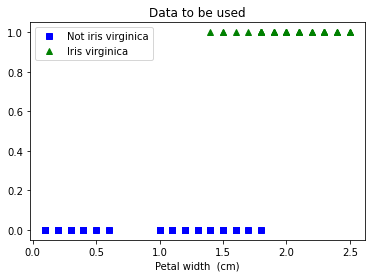

In [144]:
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.legend(["Not iris virginica","Iris virginica"])
plt.xlabel("Petal width  (cm)")
plt.title("Data to be used")
plt.show()

# Logistic regression 

Trying to find a decision boundary that seperates the two classes best. For this we are going to use the logistic (sigmoid) function to estimate probabilities.

Sigmoid function

$$
\sigma(z) = \frac{1}{1+e^{(-z)}}
$$

Loss function

$$
L(\theta) = - y^{(i)} \log(\sigma (\theta^{T}x^{(i)})) - (1 - y^{(i)}) \log (1 - (\sigma (\theta^{T}x^{(i)})))
$$

Cost function

$$
J(\theta) = - \frac{1}{m} \sum_{i=1}^{i =m}[y^{(i)} \log(\sigma (\theta^{T}x^{(i)})) + (1 - y^{(i)}) \log (1 - (\sigma (\theta^{T}x^{(i)})))]
$$

Gradient descent

$$
\theta^{next} = \theta - \alpha \frac{\partial}{\partial \theta} J(\theta)
$$


In [159]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z)) 

In [203]:
w = [1.2]
b = -5
iterations = 10000
alpha = 0.001
m = len(X)
J_hist = []

#full algorithm
for i in range(iterations):
    error = sigmoid(np.dot(X, w) + b) - y

    dj_dw = (1/m)*np.dot(X.T, error)
    dj_db = (1/m)*np.sum(error)

    # Update Parameters using w, b, alpha and gradient
    w = w - alpha * dj_dw               
    b = b - alpha * dj_db   

    #calculate cost
    total_cost = 0
    for i in range(m):
        f_w_b_i = sigmoid(np.dot(w, X[i])+ b)
        total_cost += (-y[i] * np.log(f_w_b_i)) - (1 - y[i]) * np.log(1 - f_w_b_i)
    total_cost /= m
    J_hist.append(total_cost)

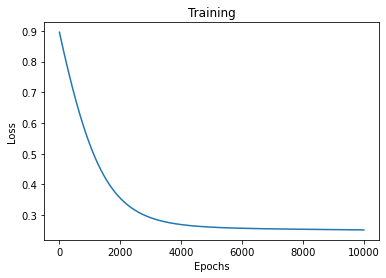

Min loss: 0.25158291300284524


In [204]:
plt.plot(J_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training")
plt.show()

print(f"Min loss: {min(J_history)}")

In [202]:
w,b

(array([2.76246473]), -4.481516498342659)